Generate plots based on parametric dataset (var alpha, fr and tau, 100 000 signals, 10 min length, spike_trains_3params_var_len600sec_100000.pkl)

In [1]:
import numpy as np
import pandas as pd
import pickle
import random
import joypy

import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from cfg_global import project_folder_path
os.chdir(current_wd)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
dataset_folder = project_folder_path + 'results\\synthetic\\dataset\\'
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'
fig_folder = project_folder_path + 'results\\synthetic\\fig_drafts_paper\\'

In [3]:
save_fig = False

### Load data

In [4]:
with open(dataset_folder + 'spike_trains_3params_var_len600sec_100000.pkl','rb') as f:
    data = pickle.load(f)

spike_trains = data['spike_trains']
alphas = data['alphas']
fr_values = data['fr_values']
taus_ms = data['tau_ms']
duration_ms = data['duration_ms']

print(f'n spike trains {len(spike_trains)}, len {spike_trains[0][-1]/1000}, duration_ms {duration_ms}')

fs = 1000

n spike trains 100000, len 598.8243581617338, duration_ms 600000


In [5]:
with open(results_folder + 'acf_isttc_full_50ms_20lags_dict.pkl', "rb") as f:
    isttc_full_dict = pickle.load(f)

with open(results_folder + 'acf_full_50ms_20lags_dict.pkl', "rb") as f:
    acf_full_dict = pickle.load(f)

print(f'len isttc_full_dict {len(isttc_full_dict)}')
print(f'len acf_full_dict {len(acf_full_dict)}')

len isttc_full_dict 100000
len acf_full_dict 100000


### Make summary dfs

In [6]:
def calculate_acf_decline_flag(acf_, start_idx=1, end_idx=4):
    acf_decay = np.all(np.diff(acf_[start_idx:end_idx]) <= 0)
    return acf_decay

In [7]:
data = []
for unit_id, unit_data in acf_full_dict.items():
    taus = unit_data['taus']  
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
acf_full_plot_df = pd.DataFrame(data)
acf_full_plot_df['tau_ms'] = acf_full_plot_df['tau'] * 50

rows_with_nans_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')
acf_full_plot_df['method'] = 'acf_full'
acf_full_plot_df['fr'] = fr_values
acf_full_plot_df['alpha'] = alphas
acf_full_plot_df['tau_ms_true'] = taus_ms
acf_full_plot_df['tau_diff_abs'] = np.abs(acf_full_plot_df['tau_ms'] - acf_full_plot_df['tau_ms_true'])
acf_full_plot_df['tau_diff_rel'] = acf_full_plot_df['tau_diff_abs'] / acf_full_plot_df['tau_ms_true'] * 100
acf_full_plot_df['ci_width'] = np.abs(acf_full_plot_df['tau_upper'] - acf_full_plot_df['tau_lower'])

acf_full_plot_df.head(2)

N rows with NaNs 11


,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,tau_ms,method,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width
0,0,2.217899,2.119224,2.316575,0.998369,True,110.894975,acf_full,7.741821,0.851099,150.923515,40.028540,26.522401,0.19735
1,1,2.568210,2.437150,2.699270,0.997899,True,128.410512,acf_full,4.394396,0.858098,147.947233,19.536721,13.205195,0.26212


In [ ]:
acf_full_plot_df.describe()

In [8]:
data = []
for unit_id, unit_data in isttc_full_dict.items():
    taus = unit_data['taus']      
    data.append({
        'unit_id': unit_id,
        'tau': taus['tau'],
        'tau_lower': taus['tau_lower'],
        'tau_upper': taus['tau_upper'],
        'fit_r_squared': taus['fit_r_squared'],
        'decline_150_250': calculate_acf_decline_flag(unit_data['acf'], start_idx=2, end_idx=4)
    })
isttc_full_plot_df = pd.DataFrame(data)
isttc_full_plot_df['method'] = 'isttc_full'
isttc_full_plot_df['tau_ms'] = isttc_full_plot_df['tau'] * 50

rows_with_nans_df = isttc_full_plot_df[isttc_full_plot_df.isna().any(axis=1)]
n_rows_with_nan = len(rows_with_nans_df)
print(f'N rows with NaNs {n_rows_with_nan}')

isttc_full_plot_df['method'] = 'isttc_full'
isttc_full_plot_df['fr'] = fr_values
isttc_full_plot_df['alpha'] = alphas
isttc_full_plot_df['tau_ms_true'] = taus_ms
isttc_full_plot_df['tau_diff_abs'] = np.abs(isttc_full_plot_df['tau_ms'] - isttc_full_plot_df['tau_ms_true'])
isttc_full_plot_df['tau_diff_rel'] = isttc_full_plot_df['tau_diff_abs'] / isttc_full_plot_df['tau_ms_true'] * 100
isttc_full_plot_df['ci_width'] = np.abs(isttc_full_plot_df['tau_upper'] - isttc_full_plot_df['tau_lower'])

isttc_full_plot_df.head(2)

N rows with NaNs 0


,unit_id,tau,tau_lower,tau_upper,fit_r_squared,decline_150_250,method,tau_ms,fr,alpha,tau_ms_true,tau_diff_abs,tau_diff_rel,ci_width
0,0,2.523412,2.362379,2.684445,0.996707,True,isttc_full,126.170618,7.741821,0.851099,150.923515,24.752897,16.400954,0.322066
1,1,2.834326,2.688470,2.980182,0.997916,True,isttc_full,141.716309,4.394396,0.858098,147.947233,6.230924,4.211585,0.291712


In [ ]:
isttc_full_plot_df.describe()

In [9]:
# check for NaNs 

rows_with_nans_acf_df = acf_full_plot_df[acf_full_plot_df.isna().any(axis=1)]
n_rows_with_nan_acf = len(rows_with_nans_acf_df)
print(f'N rows with NaNs {n_rows_with_nan_acf}')

rows_with_nans_isttc_df = isttc_full_plot_df[isttc_full_plot_df.isna().any(axis=1)]
n_rows_with_nan_isttc = len(rows_with_nans_isttc_df)
print(f'N rows with NaNs {n_rows_with_nan_isttc}')

# take from isttc dataset only rows where acf df has no NaNs
isttc_full_plot_df = isttc_full_plot_df[~isttc_full_plot_df['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]
acf_full_plot_df = acf_full_plot_df[~acf_full_plot_df['unit_id'].isin(rows_with_nans_acf_df['unit_id'].values)]

print(f'len acf_full_plot_df {len(acf_full_plot_df)}, len isttc_full_plot_df {len(isttc_full_plot_df)}')

N rows with NaNs 11
N rows with NaNs 0
len acf_full_plot_df 99989, len isttc_full_plot_df 99989


In [10]:
# check for negative R-square

rows_with_negr_acf_df = acf_full_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_acf = len(rows_with_negr_acf_df)
print(f'N rows with neg R {n_rows_with_negr_acf}')


rows_with_negr_isttc_df = isttc_full_plot_df.query('fit_r_squared < 0')
n_rows_with_negr_isttc = len(rows_with_negr_isttc_df)
print(f'N rows with neg R {n_rows_with_negr_isttc}')

acf_negr_unit_ids = rows_with_negr_acf_df['unit_id'].values
isttc_negr_unit_ids = rows_with_negr_isttc_df['unit_id'].values

unit_ids_negr_union = set(acf_negr_unit_ids).union(isttc_negr_unit_ids)
print(f'N rows in unit_ids_negr_union {len(unit_ids_negr_union)}')

isttc_full_plot_df = isttc_full_plot_df[~isttc_full_plot_df['unit_id'].isin(unit_ids_negr_union)]
acf_full_plot_df = acf_full_plot_df[~acf_full_plot_df['unit_id'].isin(unit_ids_negr_union)]

print(f'len acf_full_plot_df {len(acf_full_plot_df)}, len isttc_full_plot_df {len(isttc_full_plot_df)}')

N rows with neg R 237
N rows with neg R 238
N rows in unit_ids_negr_union 331
len acf_full_plot_df 99658, len isttc_full_plot_df 99658


In [11]:
tau_plot_long_df = pd.concat([acf_full_plot_df, isttc_full_plot_df])
tau_plot_long_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_long_df {len(tau_plot_long_df)}')

len tau_plot_long_df 199316


In [12]:
tau_plot_wide_df = acf_full_plot_df.merge(isttc_full_plot_df, suffixes=('_acf', '_isttc'), on=['unit_id','fr', 'alpha', 'tau_ms_true'], how='left')
tau_plot_wide_df.reset_index(inplace=True, drop=True)

print(f'len tau_plot_wide_df {len(tau_plot_wide_df)}')

tau_plot_wide_df.columns

len tau_plot_wide_df 99658


Index(['unit_id', 'tau_acf', 'tau_lower_acf', 'tau_upper_acf',
       'fit_r_squared_acf', 'decline_150_250_acf', 'tau_ms_acf', 'method_acf',
       'fr', 'alpha', 'tau_ms_true', 'tau_diff_abs_acf', 'tau_diff_rel_acf',
       'ci_width_acf', 'tau_isttc', 'tau_lower_isttc', 'tau_upper_isttc',
       'fit_r_squared_isttc', 'decline_150_250_isttc', 'method_isttc',
       'tau_ms_isttc', 'tau_diff_abs_isttc', 'tau_diff_rel_isttc',
       'ci_width_isttc'],
      dtype='object')

In [ ]:
tau_plot_wide_df

### Export for stats

In [ ]:
tau_plot_long_df.to_csv(results_folder + 'tau_plot_long_df.csv')

In [ ]:
tau_plot_long_df.groupby(by='method', as_index=False)['decline_150_250'].sum()

In [ ]:
tau_plot_long_df.groupby(by='method', as_index=False)['decline_150_250'].count()

In [ ]:
tau_plot_long_df.query('tau_diff_rel == 0')

### Plots

In [16]:
tau_plot_long_df.groupby(by='method', as_index=False)['tau_diff_rel'].median()

,method,tau_diff_rel
0,acf_full,13.881182
1,isttc_full,12.613595


In [18]:
tau_plot_long_df['tau_diff_rel_log10'] = np.log10(tau_plot_long_df['tau_diff_rel'])

In [26]:
sns.violinplot(y=np.abs(tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf']) cut=0)

sns.despine()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2299704994.py, line 1)

<Axes: xlabel='tau_diff_rel_log10', ylabel='Density'>

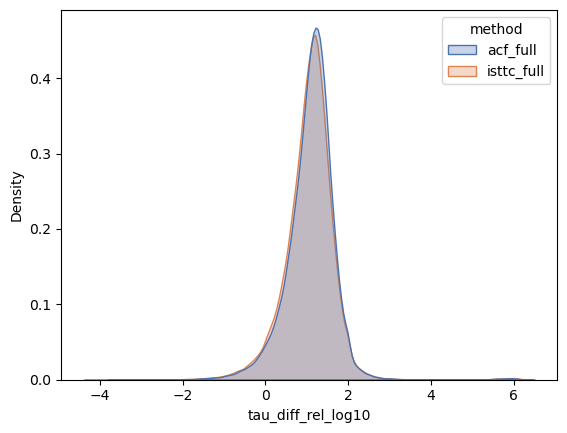

In [24]:
sns.kdeplot(
    data=tau_plot_long_df, 
    x="tau_diff_rel_log10", 
    hue="method",
    fill=True, 
    alpha=0.3,
    palette=["#4C72B0","#DD8452"]
)

In [ ]:
color_acf_full = '#4783B4'
color_isttc_full = '#E2552A'
color_pearson_trail_avg = 'slategray' 
color_sttc_trail_avg =  '#E97451' 
color_sttc_trail_concat = '#B94E48' 

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5))

norm = TwoSlopeNorm(vcenter=0)

hb0 = axes[0].hexbin(
    x=tau_plot_wide_df['fr'], y=tau_plot_wide_df['alpha'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=1                    
)

hb1 = axes[1].hexbin(
    x=tau_plot_wide_df['tau_ms_true'], y=tau_plot_wide_df['alpha'],
    C=tau_plot_wide_df['tau_diff_rel_isttc'] - tau_plot_wide_df['tau_diff_rel_acf'],
    reduce_C_function=np.median,   
    gridsize=10,                
    cmap='coolwarm',
    norm = norm,
    mincnt=1   
)

vmin = np.floor(np.min([hb0.get_array().min(), hb1.get_array().min()]))
vmax = np.ceil(np.max([hb0.get_array().max(), hb1.get_array().max()]))
#print(vmin, vmax)

hb0.set_clim(vmin, vmax)
hb1.set_clim(vmin, vmax)

fig.colorbar(hb0, ax=axes[0], shrink=1)
fig.colorbar(hb1, ax=axes[1], shrink=1)

axes[0].set_xlabel('Firing rate (hz)')
axes[1].set_xlabel('Intrinsic timescale (ms)')
axes[1].set_xticks(np.linspace(50, 300, 6))

fig.suptitle('iSTTC - ACF relative error (abs(tau - tau_true)/tau_true * 100), \n < 0: iSTTC error is lower, > 0: ACF error is lower', y=1.05)

for ax in axes.flat:
    sns.despine(ax=ax)
    ax.set_ylabel('Excitation strength (a.u.)')
    ax.set_ylim([0.1, 0.9])
    ax.set_yticks(np.linspace(0.1, 0.9, 5))

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_3_var_rel_diff.svg' , bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15, 3), sharey=False)

sns.regplot(x=tau_plot_wide_df['fr'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[0], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['fr'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[0], 
            label='isttc_full', color=color_isttc_full)
axes[0].legend(frameon=False)

sns.regplot(x=tau_plot_wide_df['alpha'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[1], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['alpha'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[1], 
            label='isttc_full', color=color_isttc_full)
axes[1].legend(frameon=False)

sns.regplot(x=tau_plot_wide_df['tau_ms_true'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_acf']), scatter=None, ax=axes[2], 
            label='acf_full', color=color_acf_full)
sns.regplot(x=tau_plot_wide_df['tau_ms_true'].values, y=np.log10(tau_plot_wide_df['tau_diff_rel_isttc']), scatter=None, ax=axes[2], 
            label='isttc_full', color=color_isttc_full)
axes[2].legend(frameon=False)


axes[0].set_xlabel('Firing rate (Hz)')
axes[1].set_xlabel('Excitation strength (a.u.)')
axes[2].set_xlabel('Intrinsic timescale (ms)')

for ax in axes.flat:
    ax.set_ylabel('Log10 diff(IT, \nground truth) (ms)')

sns.despine()

if save_fig:
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff_regplot.png' , bbox_inches='tight', dpi=300)
    plt.savefig(fig_folder + 'taus_dataset_fr_alpha_var_diff_regplot.svg' , bbox_inches='tight')